In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [12]:
df=pd.read_csv('Titanic-Dataset.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

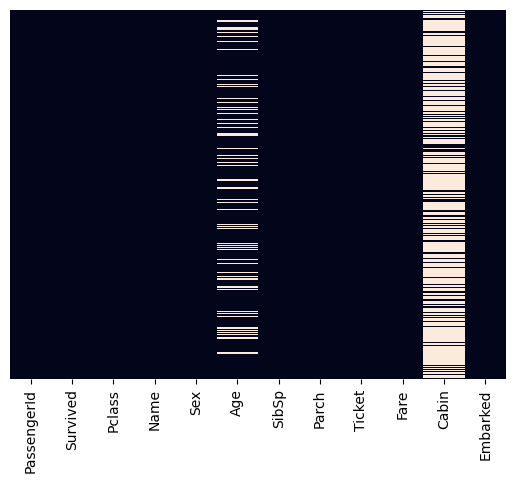

In [17]:
sns.heatmap(df.isna(),yticklabels=False ,cbar=False)

In [20]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [22]:
df.drop('Cabin',inplace= True,axis=1)

In [23]:
df['Embarked']=df['Embarked'].fillna('S')

In [24]:
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.dropna(inplace=True)

In [27]:
df.shape

(891, 11)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


HANDLING CATEGORICAL FEATURES

In [29]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [30]:
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [32]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [36]:
df=pd.concat([df,sex,Embarked],axis=1)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


VISUALIZING DATASET


<Axes: xlabel='Survived', ylabel='count'>

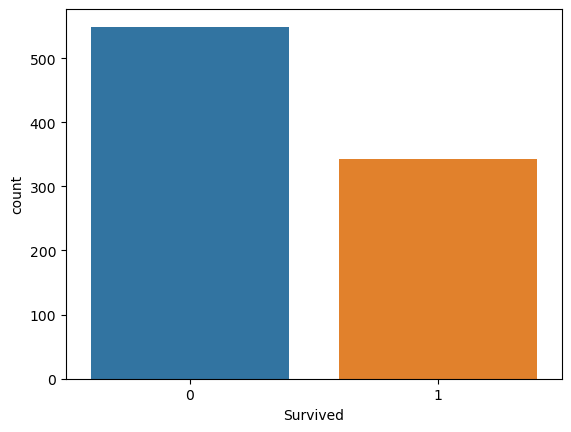

In [42]:
sns.countplot(x= 'Survived' ,data=df)

<Axes: xlabel='Survived', ylabel='count'>

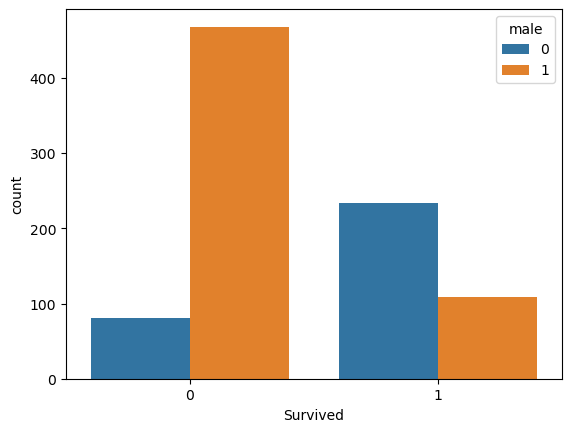

In [43]:
sns.countplot(x= 'Survived' ,data=df ,hue='male')

<Axes: xlabel='Survived', ylabel='count'>

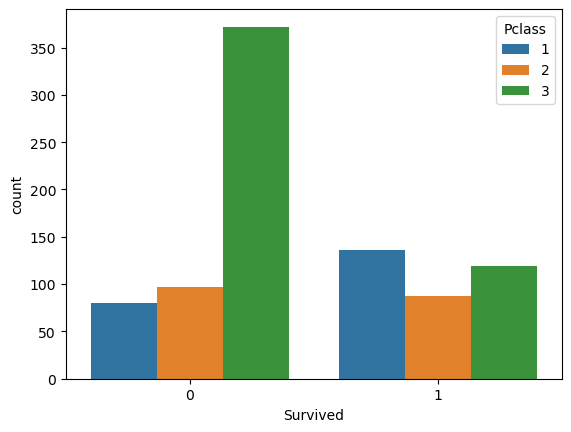

In [44]:
sns.countplot(x= 'Survived' ,data=df ,hue='Pclass')

<Axes: >

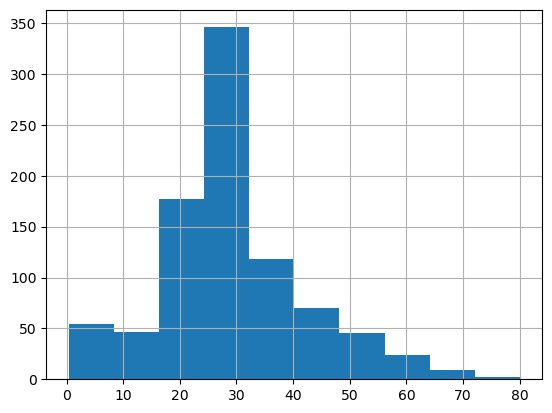

In [46]:
df['Age'].hist(bins=10)

<Axes: >

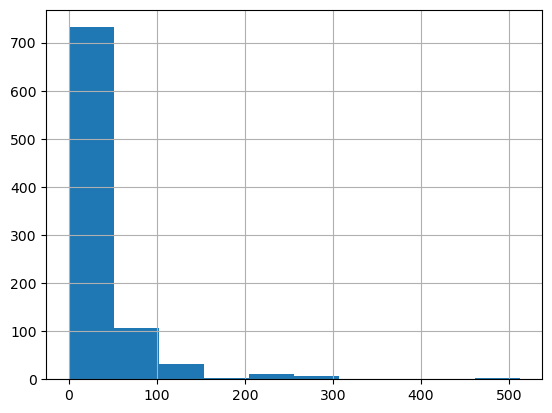

In [47]:
df['Fare'].hist(bins=10)

<Axes: ylabel='Fare'>

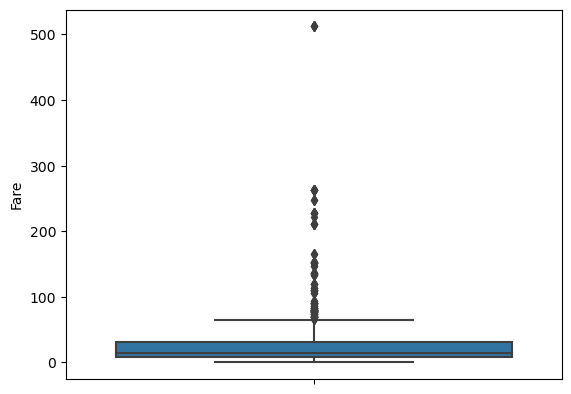

In [48]:
sns.boxplot(y='Fare',data=df)

PREPROCESSING


In [49]:
le=LabelEncoder()
df['male']=le.fit_transform(df['male'])
df['Q']=le.fit_transform(df['Q'])
df['S']=le.fit_transform(df['S'])

In [50]:
sc=MinMaxScaler()
df['Fare']=sc.fit_transform(df['Fare'].values.reshape(-1,1))

Text(0, 0.5, 'Frequency')

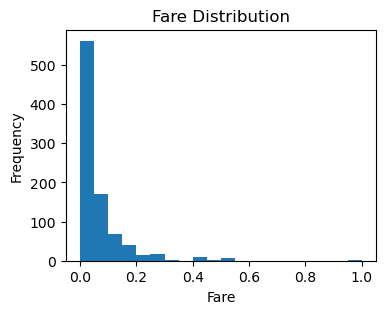

In [51]:
plt.figure(figsize=(4,3))
plt.hist(df['Fare'],bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [53]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


BUILD MODEL


In [54]:
x=df.drop((['Survived','PassengerId']),axis=1)
y=df['Survived']

In [55]:
x_train , x_test ,y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
x_train.shape , x_test.shape , y_train.shape ,y_test.shape

((712, 8), (179, 8), (712,), (179,))

LOGISTIC REGRESSION

In [58]:
lr=LogisticRegression(random_state=42)
param_grid_lr={'C'  :[100,10,1,0,0,1,0.01],'penalty':['l1','l2']}
lr_grid_model=GridSearchCV(lr,param_grid=param_grid_lr,scoring='accuracy',cv=5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters : ",lr_grid_model.best_params_)
Best_Logistic_Regression_Model=lr_grid_model.best_estimator_

E:\Users\Admin\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Users\Admin\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Best Parameters :  {'C': 1, 'penalty': 'l2'}


E:\Users\Admin\Desktop\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print("Accuracy on Training set :{:.2f}".format(lr_grid_model.best_score_*100))


Accuracy on Training set :79.21


In [61]:
LR_Grid_Score=Best_Logistic_Regression_Model.score(x_test,y_test)
print("Acuuracy By Best Logistic Regression model:",LR_Grid_Score*100)

Acuuracy By Best Logistic Regression model: 80.44692737430168


Text(0.5, 1.0, 'confusion matrix for best logistic regression')

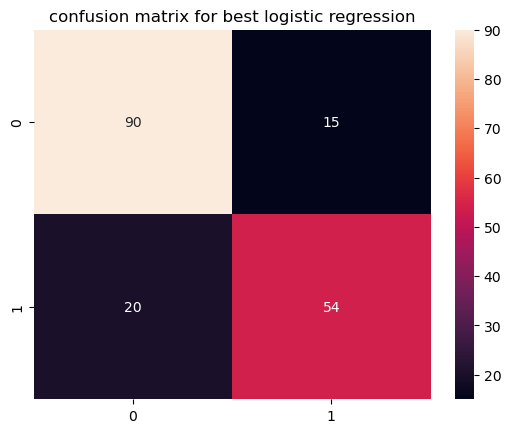

In [62]:
lr_grid_y_pred=Best_Logistic_Regression_Model.predict(x_test)
conf_matrix=confusion_matrix(y_test,lr_grid_y_pred)
sns.heatmap(conf_matrix,annot=True)
plt.title("confusion matrix for best logistic regression",fontsize=12)

DECISION TREE CLASSIFIER


In [63]:
decision_tree_model=DecisionTreeClassifier(max_depth=8,criterion='gini',min_samples_split=4,min_samples_leaf=4, random_state=44)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,
                       random_state=44)

In [64]:
y_train_pred_dt=decision_tree_model.predict(x_train)
accuracy_train_dt=accuracy_score(y_train,y_train_pred_dt)
print("Accuracy on Training set :{:.2f}".format(accuracy_train_dt*100))

Accuracy on Training set :87.78


In [65]:
DT_Score=decision_tree_model.score(x_test,y_test)
print("Accuracy by decision tree model:",DT_Score*100)

Accuracy by decision tree model: 83.79888268156425


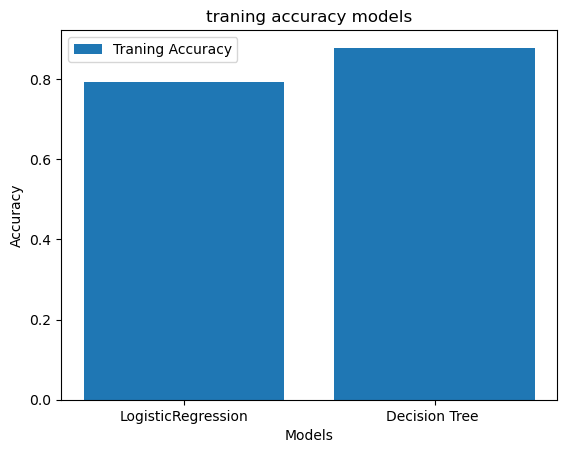

In [66]:
model_names=['LogisticRegression','Decision Tree ']
train_accuracies=[lr_grid_model.best_score_,accuracy_train_dt]
plt.bar(model_names,train_accuracies,label='Traning Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('traning accuracy models')
plt.legend()
plt.show()

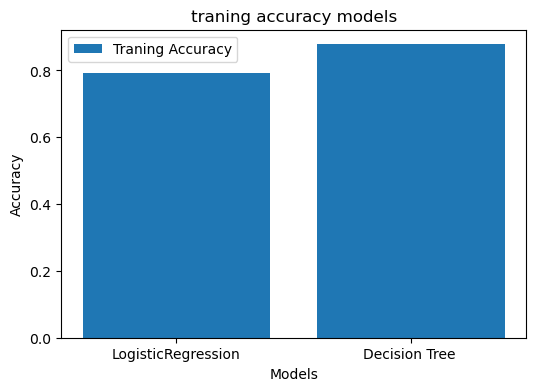

In [68]:
plt.figure(figsize=(6,4))
test_accuracies=[LR_Grid_Score,DT_Score]
plt.bar(model_names,train_accuracies,label='Traning Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('traning accuracy models')
plt.legend()
plt.show()